In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [82]:
# importing dataset

credit_data=pd.read_csv(r"E:\Credit_Risk_Modelling\credit_risk_dataset.csv")


## Data Analysis and preprocessing

In [83]:
# checking the sample of dataset

credit_data.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
13515,24,54996,RENT,0.0,MEDICAL,C,12500,12.87,0,0.23,N,2
26079,32,96000,MORTGAGE,9.0,VENTURE,A,7000,6.62,0,0.07,N,6
7767,24,54996,MORTGAGE,8.0,VENTURE,A,5500,5.99,0,0.10,N,4
14399,24,105000,MORTGAGE,4.0,VENTURE,C,4000,11.34,0,0.04,N,4
11748,25,74000,RENT,3.0,VENTURE,F,10000,18.43,1,0.14,Y,3


In [84]:
# checking the shape of dataset

credit_data.shape

# we see in the results that there are 32581 rows and 12 columns in the dataset

(32581, 12)

In [85]:
# checking dtype and null values in dataset

credit_data.info()


# we see in the results that the dtypes are fine but person_emp_length and loan_int_rate have some null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [86]:
# checking number of null values in person_emp_length column and loan_int_rate

credit_data.isnull().sum()

# We see that the number of null values is quite significant.So we can't delete the rows with these null values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [87]:
# filling the null values in loan_int_rate column with median of other values

credit_data.fillna({'loan_int_rate':credit_data['loan_int_rate'].median()},inplace=True)

In [88]:
# filling the null values in person_emp_length column with median of other values

credit_data.fillna({'person_emp_length':credit_data['person_emp_length'].median()},inplace=True)

In [89]:
# now checking the null value again

credit_data.isnull().sum()

# now we see that null values have been replaced

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [90]:
# checking duplicate rows

credit_data.duplicated().sum()

# we see in the results that there are 165 duplicated rows


165

In [91]:
# removing the duplicate rows in the dataset

credit_data.drop_duplicates(inplace=True)

In [92]:
# checking the number of rows of dataset to see whether the duplicate rows are dropped

credit_data.shape

# we see in the reuslts that 165 rows have been removed

(32416, 12)

In [93]:
# checking basic statistics of the numerical columns

credit_data.describe()

# we see that there are some illogical datapoints like max person age = 144, max person employment length= 123

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.014662,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.083050,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [94]:
# filtering the dataset to keep datapoints of people with age less than 65 only

credit_data=credit_data[credit_data['person_age']<=65]

In [95]:
# filtering the dataset to keep  datapoints of people with employment length below 45

credit_data=credit_data[credit_data['person_emp_length']<=45]

In [96]:
# checking the basic statistics of dataset again

credit_data.describe()

# we see in the results that now the maximum person age is 65 and maximum employment length is 38.

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32379.000000,3.237900e+04,32379.000000,32379.000000,32379.000000,32379.000000,32379.000000,32379.000000
mean,27.690756,6.589312e+04,4.760462,9591.976281,11.014663,0.218753,0.170238,5.794033
std,6.069767,5.251364e+04,3.977189,6319.564158,3.082904,0.413407,0.106774,4.019439
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12237.500000,13.110000,0.000000,0.230000,8.000000
max,65.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [97]:
# checking the sample of dataset

credit_data.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
22213,32,53200,MORTGAGE,13.0,PERSONAL,A,5000,10.99,0,0.09,N,8
15986,23,75000,RENT,7.0,VENTURE,C,18000,12.73,0,0.24,N,2
3743,22,25200,RENT,1.0,MEDICAL,B,4000,10.99,0,0.16,N,2
20317,28,125000,RENT,1.0,DEBTCONSOLIDATION,C,4000,13.35,0,0.03,Y,5
2653,23,33600,MORTGAGE,8.0,PERSONAL,A,8000,6.99,0,0.24,N,2
27562,33,150000,MORTGAGE,12.0,EDUCATION,B,13125,10.99,0,0.09,N,9
2963,22,96000,RENT,4.0,EDUCATION,B,3150,6.00,0,0.03,N,2
9160,24,60000,MORTGAGE,3.0,VENTURE,B,4000,12.18,0,0.07,N,2
21930,28,50400,MORTGAGE,4.0,VENTURE,A,12000,10.99,0,0.24,N,8


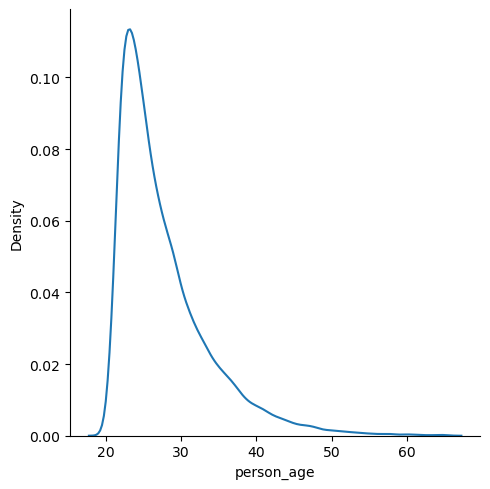

In [98]:
# checking the distribution of age of loan applicants

sns.displot(data=credit_data,kind='kde',x='person_age')
plt.show()


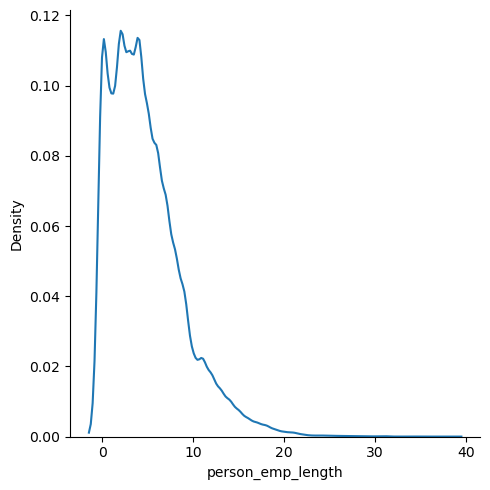

In [99]:
# checking the distribution of employment length of loan applicants

sns.displot(data=credit_data,kind='kde',x='person_emp_length')
plt.show()

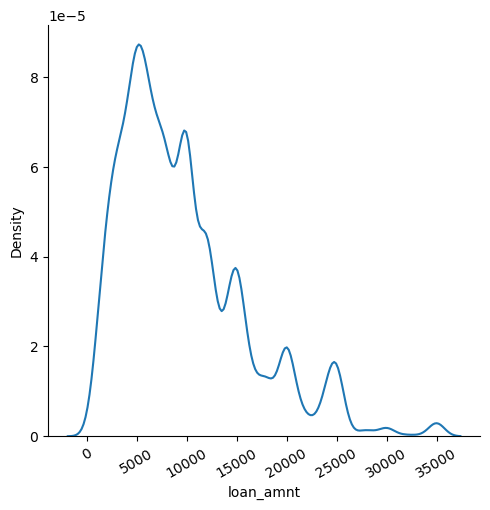

In [100]:
# checking the distribution of loan amount requested by applicants

sns.displot(data=credit_data,kind='kde',x='loan_amnt')
plt.xticks(rotation=30)
plt.show()

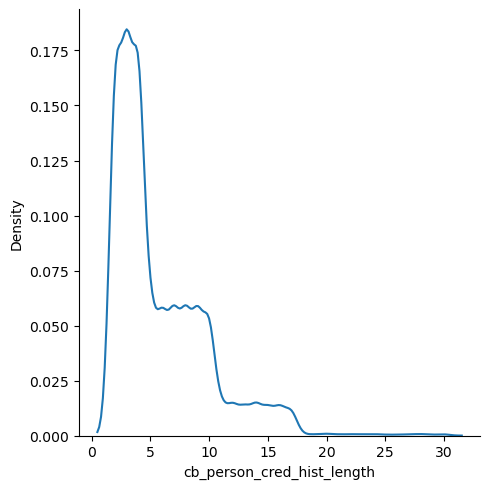

In [101]:
# checking the distribution of credit history length of loan applicants

sns.displot(data=credit_data,kind='kde',x='cb_person_cred_hist_length')
plt.show()

In [102]:
# we have four categorical columns in our dataset. 
# Out of those 4, loan_grade column seems to be of no use for the purpose of machine learning model building
# so dropping the loan_grade column

credit_data.drop(columns='loan_grade',inplace=True)

credit_data.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26541,31,30000,OWN,6.0,VENTURE,2500,11.36,0,0.08,N,9
31376,36,78000,MORTGAGE,7.0,DEBTCONSOLIDATION,9600,13.98,1,0.12,Y,13
16114,24,39996,OWN,0.0,PERSONAL,3000,7.37,0,0.08,N,2


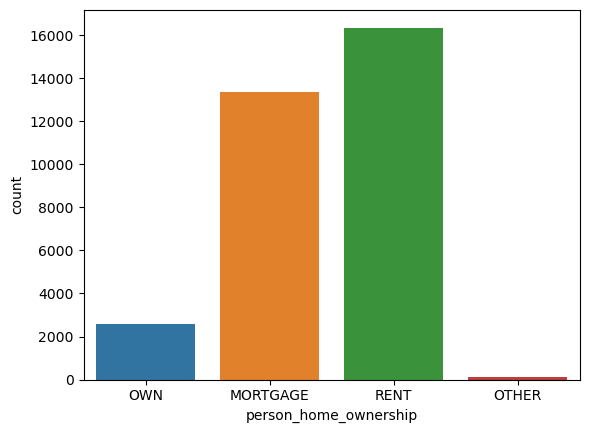

In [103]:
# plotting a graph which shows count of home ownership types of loan applicants

sns.countplot(data=credit_data,x='person_home_ownership')
plt.show()

# we see in the results that most of the loan applicants have rented home followed by mortgaged home
# very few applicants have their own homes.

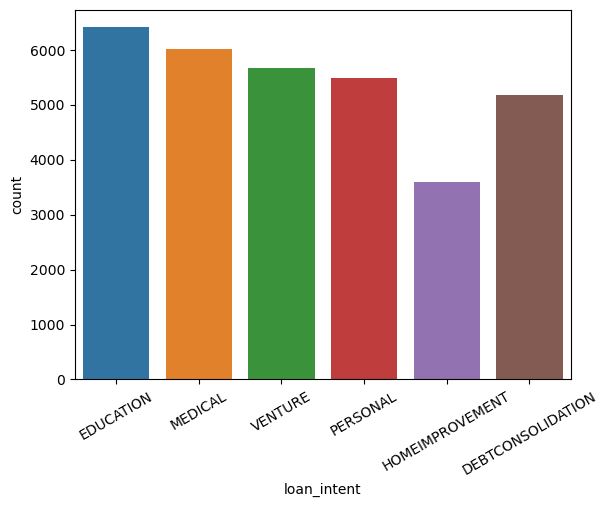

In [104]:
# plotting a graph which shows count of loan intent types of loan applicants

sns.countplot(data=credit_data,x='loan_intent')
plt.xticks(rotation=30)
plt.show()

# we see in the results that there are very close counts of different loan intents with Education being the top one and home improvement being the lowest one

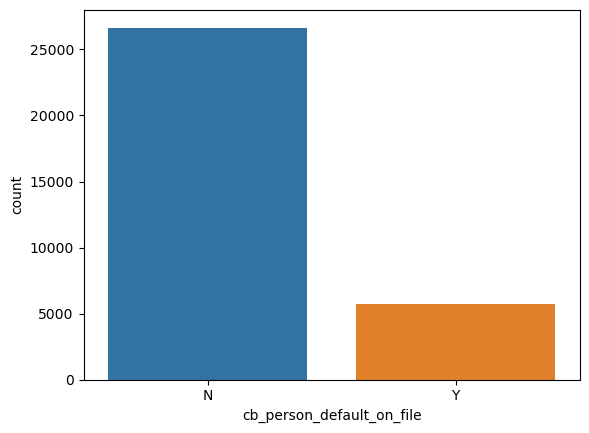

In [105]:
# plotting a graph which shows count of loan applicants having credit beaureau loan defualt on file or not having credit beaureau loan defualts

sns.countplot(data=credit_data,x='cb_person_default_on_file')
plt.show()

# we see in the results that majority of loan applicants do not have any credit defualts and a small percentage of applicants have credit defaults.
# So this is an imbalanced data. Will need to take care of it

## Model Building

##### Steps :-

1. Separate input features and target label
2. Train-Test Split
3. Encoding categorical data
4. Scaling the numerical features
5. Balancing the data using SMOTE (Synthetic Minority Over-Sampling Technique )
6. Training the model
7. Making predictions using the model
8. Evaluating the model

In [106]:
# separating input features and target lable

X=credit_data.drop(columns=['loan_status'])  # input features
y=credit_data['loan_status'].copy()          # target label

In [107]:
# viewing sample of input features

X.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12078,24,24000,RENT,0.0,EDUCATION,11500,7.51,0.48,N,3
11148,22,50000,RENT,6.0,EDUCATION,10000,10.99,0.20,N,2
1598,25,33996,RENT,8.0,MEDICAL,1500,16.82,0.04,N,4


In [108]:
# viewing sample of target lable

y.sample(3)

24312    0
28972    0
10186    1
Name: loan_status, dtype: int64

In [109]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
# creating a list of numerical columns from input features

numerical_columns=X_train.select_dtypes(include='number').columns.to_list()
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [111]:
# creating a list of columns for One Hot Encoding and binary encoding

category_ohe=['person_home_ownership','loan_intent']
category_be=['cb_person_default_on_file']

print(category_ohe)
print(category_be)

['person_home_ownership', 'loan_intent']
['cb_person_default_on_file']


In [112]:
# creating a column transformer for scaling of numerical columns and encoding of categorical columns

trf = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,drop='first'),category_ohe),  # Applying OneHotEncoder 
        ('binary', ce.BinaryEncoder(),category_be),  # Applying BinaryEncoder 
        ('scaler', StandardScaler(),numerical_columns)  # Applying StandardScaler to numerical columns
    ])

In [113]:
X_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [114]:
# transforming training and testing input features

trf.fit(X_train)


ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['person_home_ownership', 'loan_intent']),
                                ('binary', BinaryEncoder(),
                                 ['cb_person_default_on_file']),
                                ('scaler', StandardScaler(),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [ ]:
# exporting the transformer

# pickle.dump(trf,open('transformer.pkl','wb'))

In [ ]:
# checking the shape of X_train before transformation
X_train.shape

(25903, 10)

In [115]:
# tranforming the training and testing input features

X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [36]:
# checking the shape of X_train after transformation

X_train.shape

(25903, 17)

In [243]:
# balancing the input training features and training target label

balancer=SMOTE(random_state=42)

X_train_resampled,y_train_resampled=balancer.fit_resample(X_train,y_train)

In [77]:
credit_data['loan_percent_income'].max()

0.83

### Logistic regression model

In [275]:
# Fitting

lr=LogisticRegression(solver='liblinear')

lr.fit(X_train_resampled,y_train_resampled)


LogisticRegression(solver='liblinear')

In [276]:
# prediction of class

y_pred_lr=lr.predict(X_test)
y_pred_lr


array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [277]:
# prediction of probability

y_proba_lr=lr.predict_proba(X_test)
y_proba_lr

array([[0.95679718, 0.04320282],
       [0.94825945, 0.05174055],
       [0.14467826, 0.85532174],
       ...,
       [0.48188471, 0.51811529],
       [0.89691499, 0.10308501],
       [0.77535658, 0.22464342]])

In [278]:
# Accuracy score

acc_score_lr=accuracy_score(y_test,y_pred_lr)
acc_score_lr

0.7773316862260655

### Naive Bayes model

In [249]:
# Fitting

nb=GaussianNB()
nb.fit(X_train_resampled,y_train_resampled)

GaussianNB()

In [250]:
# prediction of class

y_pred_nb=nb.predict(X_test)
y_pred_nb

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [251]:
# prediction of probability

y_proba_nb=nb.predict_proba(X_test)
y_proba_nb

array([[9.99999994e-01, 5.63202754e-09],
       [9.74557325e-01, 2.54426751e-02],
       [2.70998868e-03, 9.97290011e-01],
       ...,
       [4.56434246e-01, 5.43565754e-01],
       [9.56738668e-01, 4.32613318e-02],
       [8.44336938e-01, 1.55663062e-01]])

In [252]:
# Accuracy score

acc_score_nb=accuracy_score(y_test,y_pred_nb)
acc_score_nb

0.7172637430512662

### K Nearest Neighbours model

In [253]:
# Fitting

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [254]:
# Prediction of class

y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [255]:
# Prediction of probability

y_proba_knn=knn.predict_proba(X_test)
y_proba_knn

array([[1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

In [256]:
# Accuracy score

acc_score_knn=accuracy_score(y_test,y_pred_knn)
acc_score_knn

0.7878319950586782

### Decision tree model

In [281]:
# Fitting

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [282]:
# prediction of class

y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# prediction of probability

y_proba_dtc=dtc.predict_proba(X_test)
y_proba_dtc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [284]:
# Accuracy 

acc_score_dtc=accuracy_score(y_test,y_pred_dtc)
acc_score_dtc

0.8563928350833848

## Ensemble Algorithms

#### Random forest

In [288]:
# Fitting

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [289]:
# prediction of class

y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [290]:
# prediction of probability

y_proba_rf=rf.predict_proba(X_test)
y_proba_rf

array([[0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49],
       ...,
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.87, 0.13]])

In [291]:
# Accuracy

acc_score_rf=accuracy_score(y_test,y_pred_rf)
acc_score_rf

0.9147621988882026

#### Gradient Boosting

In [296]:
# Fitting

gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [297]:
# prediction of class

y_pred_gb=gb.predict(X_test)
y_pred_gb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [333]:
# prediction of probability

y_proba_gb=gb.predict_proba(X_test)
pd.DataFrame(y_proba_gb).sample(10)

,0,1
4818,0.029712,0.970288
6100,0.736103,0.263897
1781,0.900930,0.099070
1584,0.967321,0.032679
5100,0.157979,0.842021
759,0.944433,0.055567
3423,0.946932,0.053068
4003,0.419088,0.580912
1797,0.554354,0.445646
4117,0.730786,0.269214


In [299]:
# Accuracy

acc_score_gb=accuracy_score(y_test,y_pred_gb)
acc_score_gb

0.8936071649166152

### XGBoost

In [303]:
# Fitting

xgb=XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [304]:
# Prediction of class

y_pred_xgb=xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [325]:
# Prediction of probability

y_proba_xgb=xgb.predict_proba(X_test)
pd.DataFrame(y_proba_xgb).sample(100)

,0,1
3068,0.873130,0.126870
265,0.831236,0.168764
2151,0.950067,0.049933
1423,0.224596,0.775404
2897,0.798959,0.201041
...,...,...
1929,0.879394,0.120606
2188,0.836208,0.163792
563,0.992029,0.007971
5424,0.928717,0.071283


In [306]:
# Accuracy

acc_score_xgb=accuracy_score(y_test,y_pred_xgb)
acc_score_xgb

0.9240271772699197

## Hyperparameter tuning

In [ ]:
# hyperparameter tuning of Logistic regression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy', 
    verbose=2,
    n_jobs=-1
)  

grid_search_lr.fit(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [ ]:
accuracy_score(y_test,grid_search_lr.predict(X_test))

# we see in the results that there is not much difference in accuracy

0.7787214329833231

In [ ]:
# Hyperparameter tuning of Decision tree

param_grid = {
    'max_depth': [20, 30, 40, 50],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10]         # Minimum number of samples required to be at a leaf node
}

grid_search_dt = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=5,              
    scoring='accuracy',  
    verbose=2,
    n_jobs=-1
)


grid_search_dt.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=2)

In [ ]:
accuracy_score(y_test,grid_search_dt.predict(X_test))
# we see in the results that there is a slight increase in accuracy

0.865657813465102

In [294]:
# Hyperparameter tuning of Random forest


param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [ 10, 20, 30],                # Maximum depth of each tree           
    'min_samples_leaf': [1, 2]                 # Minimum samples required to be at a leaf node       
}


grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,             
    scoring='accuracy',  
    verbose=2,
    n_jobs=-1
)


grid_search_rf.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
accuracy_score(y_test,grid_search_rf.predict(X_test))

# we see that the accuracy decreased 


0.9138357010500309

In [ ]:
# hyperparameter tuning of gradient boost


param_grid = {
    'n_estimators': [100,200],          # Number of boosting stages
    'learning_rate': [0.01, 0.1],       # Step size shrinkage used in updates
    'max_depth': [5,7],                 # Maximum depth of the individual estimators
    'min_samples_leaf': [1,2]           # Minimum samples required at a leaf node
}


grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,                  
    scoring='accuracy',    
    verbose=2,
    n_jobs=-1
)


grid_search_gb.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 7],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
accuracy_score(y_test,grid_search_rf.predict(X_test))
# we see in the results that there is a slight increase in accuracy

0.9138357010500309

In [311]:
# Hyperparameter tuning of XGBoost

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1],              # Step size shrinkage
    'max_depth': [3, 5, 7],                    # Maximum tree depth for base learners
    'min_child_weight': [1, 3, 5],             # Minimum sum of instance weight needed in a child
}


grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,                  
    scoring='accuracy',    
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_xgb.fit(X_train_resampled, y_train_resampled)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
accuracy_score(y_test,grid_search_xgb.predict(X_test))
# we see in the results that there is not much difference in the results

0.926189005558987

##### Exporting the model
It is noticed that gradient boosting has good enough accuracy and its probability prediction seem to be more practical(not on extremes like 0.1,0.9 etc) which would would serve our purpose of building an app that shows credit risk in terms of probability of default and probability of non-default. Therefore exporting the gradient boosting model.

In [ ]:
# pickle.dump(gb, open('gb_model.pkl', 'wb'))

#### Now this exported model can also be imported and used for prediction.
Given below is a demonstration of how this can be used.

In [79]:
# importing model

model=pickle.load(open('gb_model.pkl','rb'))

In [116]:
# using the model for prediction

model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)